In [1]:
%cd /content/drive/MyDrive/"Colab Notebooks"/MCUT/R911R912
!pwd
!ls

/content/drive/MyDrive/Colab Notebooks/MCUT/R911R912
/content/drive/MyDrive/Colab Notebooks/MCUT/R911R912
 ARO1_pearsonr_corr.csv		       'ARO2_可控_Feature Selection.ipynb'
'ARO1_不可控_Feature Selection.ipynb'   ARO2_可控_Xgboost.ipynb
 ARO1_不可控_Xgboost.ipynb	       'R911R912 _ARO1_R2.xlsx'
'ARO1_可控_Feature Selection.ipynb'     R911R912.pptx
 ARO1_可控_Xgboost.ipynb	       'R911R912 _明志蔡教授_R2.xlsx'
 ARO2_pearsonr_corr.csv		        test.csv
'ARO2_不可控_Feature Selection.ipynb'   Untitled0.ipynb
 ARO2_不可控_Xgboost.ipynb


In [2]:
import pandas as pd
path = "R911R912 _ARO1_R2.xlsx"
xls = pd.ExcelFile(path)
sheets = xls.sheet_names
display(sheets)

['R911R912_TAG清單',
 'R911R912_TAG相關錶點資料(X)',
 '目標值(Y)相關錶點資料',
 'R911R912_TAG相關錶點資料(停用)']

In [3]:
df = xls.parse(sheets[1])
df.columns.values[2] = "time"
df = df.iloc[:,2:]
for i in df.columns[1:]:
  df[i] = pd.to_numeric(df[i],errors='coerce')

df

,time,ARO1-DCS-FIC_91103_1,ARO1-DCS-FI_91203,ARO1-DCS-FIC_98102_1,ARO1-DCS-FIC_98102_1.RESULT,ARO1-DCS-FIC_98302_1,ARO1-DCS-FIC_98302_1.RESULT,ARO1-DCS-FIC_98401_1,ARO1-DCS-FIC_98401_1.RESULT,ARO1-DCS-FIC_98403_1,ARO1-DCS-FIC_98403_1.RESULT,ARO1-DCS-FI_91701,ARO1-DCS-FIC_92001_1,ARO1-DCS-FIC_92001_1.RESULT,ARO1-DCS-FIC_91101_2,ARO1-DCS-FIC_91102_2,ARO1-DCS-FIC_91105_2,ARO1-DCS-FIC_91106_2,ARO1-DCS-FIC_91201_2,ARO1-DCS-FIC_91202_2,ARO1-DCS-FIC_91204_2,ARO1-DCS-FIC_91205_2,ARO1-DCS-FIC_98103_2,ARO1-DCS-FI_98104,ARO1-DCS-PI99801,ARO1-DCS-PDI98301A,ARO1-DCS-PDI98301,ARO1-DCS-PDI98401A,ARO1-DCS-PDI98401,ARO1-DCS-PIC_91103_2,ARO1-DCS-PIC_91203_2,ARO1-DCS-PIC_98104,ARO1-DCS-AC_A_FA,ARO1-DCS-AC_HF,ARO1-DCS-AC_L2_A,ARO1-DCS-AC_L3_A,ARO1-DCS-AC_L4_A,ARO1-DCS-AC_XF,ARO1-DCS-AC_CTIME,ARO1-DCS-AC_STIME,ARO1-DCS-AC_BPOSIT,ARO1-DCS-AC_ZPOSIT,ARO1-DCS-TI91101,ARO1-DCS-TI91102,ARO1-DCS-TI91103,ARO1-DCS-TI91201,ARO1-DCS-TI91202,ARO1-DCS-TI91203,ARO1-DCS-TI98101,ARO1-DCS-TI98301,ARO1-DCS-TI98401,ARO1-DCS-PDI_91102,ARO1-DCS-PDI_91202,Unnamed: 55,ARO1-LIMS-S704-BR_INDEX,ARO1-LIMS-s704-744-C9,ARO1-LIMS-s704-744-C10+,ARO1-LIMS-S704-WATER,ARO1-LIMS-S704-TS,Unnamed: 61,ARO1-LIMS-s909-744-C9,ARO1-LIMS-s909-744-C10+,ARO1-LIMS-S909-BR_INDEX
0,638.648,638.326498,645.390457,12.753275,12.620982,224.998505,226.569753,233.111313,234.925810,10.627063,10.298245,338.809978,129.936996,131.572994,1.885369,0.401148,1.507488,0.299522,1.889085,0.398458,1.518974,0.303597,3.518285,2.526874,84.536913,0.291371,0.255862,0.095175,0.007874,8.821634,8.918269,11.800180,0.485000,120.012001,0.429883,1.540154,-0.510051,100.010002,33.163315,82.908287,12.540664,3.521895,178.537578,179.139479,178.534850,178.218629,175.364987,177.784863,172.246111,174.206662,175.822041,2.540602,2.542738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,651.542,653.593980,634.264966,12.753275,12.587158,224.998505,226.244344,233.111313,234.872984,10.627063,10.301716,338.360227,129.936996,131.473092,1.888818,0.401412,1.510603,0.299642,1.899350,0.398796,1.514563,0.303297,3.526920,2.546981,84.191297,0.295791,0.255753,0.095128,0.001296,8.783562,8.912538,11.800180,0.485000,120.012001,0.429883,1.540154,-0.510051,100.010002,33.163315,82.908287,12.978793,3.264048,178.265739,178.800611,178.838395,178.610685,175.723069,177.540527,172.597339,174.262855,175.847181,2.513337,2.541914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,648.831,647.641213,657.156365,12.753275,12.607229,224.998505,226.424603,233.111313,234.950889,10.627063,10.321101,337.969906,129.936996,131.564755,1.892267,0.401675,1.510152,0.299925,1.909615,0.399135,1.510151,0.302997,3.540352,2.537632,84.065362,0.300423,0.255600,0.095081,0.000000,8.805391,8.883338,11.800180,0.485000,120.012001,0.429883,1.540154,-0.510051,100.010002,33.163315,82.908287,13.555962,3.498006,178.424725,179.260974,178.610967,178.367909,175.580795,177.818968,172.969119,174.365563,175.872321,2.502503,2.557038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,622.012,624.454044,654.174919,12.753275,12.578797,224.998505,226.657531,233.111313,235.025767,10.627063,10.324364,338.792444,129.936996,131.542983,1.895715,0.401938,1.508051,0.300244,1.919879,0.399474,1.505740,0.302697,3.553602,2.576011,83.905619,0.305054,0.255448,0.095034,0.000000,8.811242,8.937288,11.800180,0.485000,120.012001,0.429883,1.540154,-0.510051,100.010002,33.163315,82.908287,11.735377,3.635918,178.996485,179.209042,178.708438,178.179457,175.744517,177.942545,173.289535,174.401102,175.897461,2.495342,2.545303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,671.924,668.433262,659.249929,12.753275,12.576618,224.998505,226.442403,233.111313,234.928731,10.627063,10.321405,338.792089,129.936996,131.403688,1.899164,0.402052,1.505951,0.300563,1.930144,0.399841,1.501329,0.302347,3.536068,2.516979,83.985020,0.309685,0.255295,0.094987,0.000000,8.783462,8.909147,11.800180,0.485000,120.012001,0.429839,1.540154,-0.510051,100.010002,33.163315,82.908287,13.762701,3.110098,178.581432,178.968917,178.518519,178.497555,176.241195,178.172122,173.193791,174.500

In [4]:
df.columns

Index(['time', 'ARO1-DCS-FIC_91103_1', 'ARO1-DCS-FI_91203',
       'ARO1-DCS-FIC_98102_1', 'ARO1-DCS-FIC_98102_1.RESULT',
       'ARO1-DCS-FIC_98302_1', 'ARO1-DCS-FIC_98302_1.RESULT',
       'ARO1-DCS-FIC_98401_1', 'ARO1-DCS-FIC_98401_1.RESULT',
       'ARO1-DCS-FIC_98403_1', 'ARO1-DCS-FIC_98403_1.RESULT',
       'ARO1-DCS-FI_91701', 'ARO1-DCS-FIC_92001_1',
       'ARO1-DCS-FIC_92001_1.RESULT', 'ARO1-DCS-FIC_91101_2',
       'ARO1-DCS-FIC_91102_2', 'ARO1-DCS-FIC_91105_2', 'ARO1-DCS-FIC_91106_2',
       'ARO1-DCS-FIC_91201_2', 'ARO1-DCS-FIC_91202_2', 'ARO1-DCS-FIC_91204_2',
       'ARO1-DCS-FIC_91205_2', 'ARO1-DCS-FIC_98103_2', 'ARO1-DCS-FI_98104',
       'ARO1-DCS-PI99801', 'ARO1-DCS-PDI98301A', 'ARO1-DCS-PDI98301',
       'ARO1-DCS-PDI98401A', 'ARO1-DCS-PDI98401', 'ARO1-DCS-PIC_91103_2',
       'ARO1-DCS-PIC_91203_2', 'ARO1-DCS-PIC_98104', 'ARO1-DCS-AC_A_FA',
       'ARO1-DCS-AC_HF', 'ARO1-DCS-AC_L2_A', 'ARO1-DCS-AC_L3_A',
       'ARO1-DCS-AC_L4_A', 'ARO1-DCS-AC_XF', 'ARO1-DCS-AC_CTIM

In [5]:
df_1 = xls.parse(sheets[2])
df_1 = df_1.iloc[:,1:]
for i in df_1.columns[1:]:
  df_1[i] = pd.to_numeric(df_1[i],errors='coerce')

df_1

,ARO1-LIMS-s704-744-p-Xylene,ARO1-LIMS-s912-744-Ethylbz,ARO1-LIMS-s912-744-p-Xylene,ARO1-LIMS-s912-744-m-Xylene,ARO1-LIMS-s912-744-o-Xylene,ARO1-DCS-PX 回收率,ARO1-LIMS-s917-744-p-Xylene,ARO1-LIMS-s916-744-p-Xylene
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
71443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
x_col = ["ARO1-DCS-FIC_98302_1", "ARO1-DCS-FIC_98401_1","ARO1-LIMS-S704-BR_INDEX", 
     "ARO1-LIMS-s704-744-C9", "ARO1-LIMS-s704-744-C10+", "ARO1-LIMS-S704-WATER",
     "ARO1-LIMS-S704-TS", "ARO1-DCS-PDI_91102", "ARO1-DCS-PDI_91202"]

y_col= ["ARO1-LIMS-s912-744-p-Xylene", "ARO1-LIMS-s912-744-m-Xylene",
    "ARO1-LIMS-s917-744-p-Xylene", "ARO1-LIMS-s916-744-p-Xylene", "ARO1-DCS-PX 回收率"]

col = x_col + y_col

df_2 = df[x_col].join(df_1[y_col])

y_col = x_col[7:] + y_col
x_col = x_col[:7]

df_2

,ARO1-DCS-FIC_98302_1,ARO1-DCS-FIC_98401_1,ARO1-LIMS-S704-BR_INDEX,ARO1-LIMS-s704-744-C9,ARO1-LIMS-s704-744-C10+,ARO1-LIMS-S704-WATER,ARO1-LIMS-S704-TS,ARO1-DCS-PDI_91102,ARO1-DCS-PDI_91202,ARO1-LIMS-s912-744-p-Xylene,ARO1-LIMS-s912-744-m-Xylene,ARO1-LIMS-s917-744-p-Xylene,ARO1-LIMS-s916-744-p-Xylene,ARO1-DCS-PX 回收率
0,224.998505,233.111313,NaN,NaN,NaN,NaN,NaN,2.540602,2.542738,NaN,NaN,NaN,NaN,NaN
1,224.998505,233.111313,NaN,NaN,NaN,NaN,NaN,2.513337,2.541914,NaN,NaN,NaN,NaN,NaN
2,224.998505,233.111313,NaN,NaN,NaN,NaN,NaN,2.502503,2.557038,NaN,NaN,NaN,NaN,NaN
3,224.998505,233.111313,NaN,NaN,NaN,NaN,NaN,2.495342,2.545303,NaN,NaN,NaN,NaN,NaN
4,224.998505,233.111313,NaN,NaN,NaN,NaN,NaN,2.537570,2.538941,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71443,254.993500,271.035095,NaN,NaN,NaN,NaN,NaN,3.097940,3.111554,NaN,NaN,NaN,NaN,NaN
71444,254.993500,271.035095,NaN,NaN,NaN,NaN,NaN,3.097372,3.100117,NaN,NaN,NaN,NaN,NaN
71445,254.993500,271.035095,NaN,NaN,NaN,NaN,NaN,3.057514,3.120830,NaN,NaN,NaN,NaN,NaN
71446,254.993500,271.035095,NaN,NaN,NaN,NaN,NaN,3.055393,3.107769,NaN,NaN,NaN,NaN,NaN


In [24]:
from sklearn.preprocessing import MinMaxScaler

df_2[["ARO1-DCS-FIC_98302_1", "ARO1-DCS-FIC_98401_1"]] = df_2[["ARO1-DCS-FIC_98302_1", "ARO1-DCS-FIC_98401_1"]] / 381237

scaler = MinMaxScaler()
scaler.fit(df_2[x_col])
df_2[x_col] = scaler.transform(df_2[x_col])

In [26]:
df_2.describe()

,ARO1-DCS-FIC_98302_1,ARO1-DCS-FIC_98401_1,ARO1-LIMS-S704-BR_INDEX,ARO1-LIMS-s704-744-C9,ARO1-LIMS-s704-744-C10+,ARO1-LIMS-S704-WATER,ARO1-LIMS-S704-TS,ARO1-DCS-PDI_91102,ARO1-DCS-PDI_91202,ARO1-LIMS-s912-744-p-Xylene,ARO1-LIMS-s912-744-m-Xylene,ARO1-LIMS-s917-744-p-Xylene,ARO1-LIMS-s916-744-p-Xylene,ARO1-DCS-PX 回收率
count,7.135900e+04,7.135900e+04,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,71359.000000,71359.000000,8931.000000,8931.000000,2977.000000,2977.000000,2888.000000
mean,1.084230e-20,1.128262e-20,0.140188,0.020333,0.000179,0.077885,0.013144,2.758739,2.707088,122.028883,1192.106326,38.260855,0.474719,96.850040
std,2.500295e-21,2.580684e-21,0.089770,0.016188,0.011182,0.040020,0.026206,0.576125,0.572117,1484.705093,1741.188641,7.281485,2.093739,2.964948
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063800,0.139300,0.189600,0.022000,-8.583796
25%,1.065122e-20,1.075803e-20,0.082071,0.011603,0.000000,0.058630,0.005376,2.554684,2.520615,99.716499,829.000000,36.397400,0.189200,96.738644
50%,1.192974e-20,1.238363e-20,0.121843,0.017523,0.000000,0.070187,0.005376,3.011108,2.975995,99.732399,1214.000000,39.210800,0.343800,97.069172
75%,1.192974e-20,1.257906e-20,0.174874,0.025337,0.000000,0.087660,0.010753,3.115376,3.044215,99.773804,1432.000000,42.819099,0.456000,97.322660
max,1.207993e-20,1.283055e-20,1.000000,1.000000,1.000000,1.000000,1.000000,4.998610,4.971062,99329.703125,89671.000000,50.292000,44.683201,100.000000


In [27]:
df_2_1_8 = df_2.loc[df_2["ARO1-LIMS-s912-744-p-Xylene"].notna(),]
df_2_1_8

,ARO1-DCS-FIC_98302_1,ARO1-DCS-FIC_98401_1,ARO1-LIMS-S704-BR_INDEX,ARO1-LIMS-s704-744-C9,ARO1-LIMS-s704-744-C10+,ARO1-LIMS-S704-WATER,ARO1-LIMS-S704-TS,ARO1-DCS-PDI_91102,ARO1-DCS-PDI_91202,ARO1-LIMS-s912-744-p-Xylene,ARO1-LIMS-s912-744-m-Xylene,ARO1-LIMS-s917-744-p-Xylene,ARO1-LIMS-s916-744-p-Xylene,ARO1-DCS-PX 回收率
7,1.065122e-20,1.103528e-20,0.077020,0.017049,0.0,0.056437,0.005376,2.528644,2.541595,99.795898,604.0,48.698700,0.0395,NaN
15,1.065122e-20,1.103528e-20,0.077020,0.018470,0.0,0.056437,0.005376,2.562995,2.535559,99.846497,584.0,NaN,NaN,NaN
23,1.065122e-20,1.103528e-20,0.090909,0.023206,0.0,0.066855,0.010753,2.490574,2.558351,99.843201,612.0,NaN,NaN,NaN
31,1.065122e-20,1.103528e-20,0.066288,0.022259,0.0,0.062384,0.010753,2.555208,2.509361,99.835800,622.0,48.840199,0.1322,NaN
39,1.065122e-20,1.103528e-20,0.066288,0.013024,0.0,0.062384,0.010753,2.559671,2.519720,99.822998,669.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71415,1.207116e-20,1.283055e-20,0.046717,0.020838,0.0,0.063270,0.010753,3.070490,3.069563,99.722000,1586.0,NaN,NaN,96.334282
71423,1.207116e-20,1.283055e-20,0.046086,0.021075,0.0,0.046777,0.005376,3.091588,3.089269,99.722504,1564.0,NaN,NaN,96.361374
71431,1.207116e-20,1.283055e-20,0.037247,0.015865,0.0,0.085414,0.005376,3.070895,3.085334,99.724098,1570.0,36.984600,0.1525,96.388466
71439,1.207116e-20,1.283055e-20,0.037247,0.021312,0.0,0.085414,0.005376,3.089878,3.090815,99.724197,1580.0,NaN,NaN,96.411087


In [28]:
df_2_1_24 = df_2.loc[df_2["ARO1-DCS-PX 回收率"].notna(),]
df_2_1_24

,ARO1-DCS-FIC_98302_1,ARO1-DCS-FIC_98401_1,ARO1-LIMS-S704-BR_INDEX,ARO1-LIMS-s704-744-C9,ARO1-LIMS-s704-744-C10+,ARO1-LIMS-S704-WATER,ARO1-LIMS-S704-TS,ARO1-DCS-PDI_91102,ARO1-DCS-PDI_91202,ARO1-LIMS-s912-744-p-Xylene,ARO1-LIMS-s912-744-m-Xylene,ARO1-LIMS-s917-744-p-Xylene,ARO1-LIMS-s916-744-p-Xylene,ARO1-DCS-PX 回收率
48343,1.207116e-20,1.264421e-20,0.184343,0.024627,0.0,0.065906,0.010753,3.201388,3.078681,99.729500,1426.0,40.2719,0.1478,98.130379
48351,1.207116e-20,1.264421e-20,0.184343,0.022733,0.0,0.065906,0.010753,3.220219,3.095162,99.726196,1427.0,NaN,NaN,98.110786
48359,1.207116e-20,1.264421e-20,0.184343,0.015392,0.0,0.065906,0.005376,3.192025,3.095682,99.716202,1449.0,NaN,NaN,98.091202
48367,1.207116e-20,1.264421e-20,0.371212,0.017286,0.0,0.051481,0.005376,3.217971,3.085251,99.705101,1449.0,40.2719,0.1478,98.093559
48375,1.207116e-20,1.264421e-20,0.371212,0.015865,0.0,0.051481,0.005376,3.229049,3.087482,99.706703,1445.0,NaN,NaN,98.097794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71415,1.207116e-20,1.283055e-20,0.046717,0.020838,0.0,0.063270,0.010753,3.070490,3.069563,99.722000,1586.0,NaN,NaN,96.334282
71423,1.207116e-20,1.283055e-20,0.046086,0.021075,0.0,0.046777,0.005376,3.091588,3.089269,99.722504,1564.0,NaN,NaN,96.361374
71431,1.207116e-20,1.283055e-20,0.037247,0.015865,0.0,0.085414,0.005376,3.070895,3.085334,99.724098,1570.0,36.9846,0.1525,96.388466
71439,1.207116e-20,1.283055e-20,0.037247,0.021312,0.0,0.085414,0.005376,3.089878,3.090815,99.724197,1580.0,NaN,NaN,96.411087


In [29]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()
  
  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)
  
  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  
  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
  
  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
      mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
  '% of Total Values', ascending=False).round(1)
  
  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
      "There are " + str(mis_val_table_ren_columns.shape[0]) +
        " columns that have missing values.")
  
  # Return the dataframe with missing information
  return mis_val_table_ren_columns

# Missing values statistics
missing_values = missing_values_table(df_2)
missing_values.head(20)

Your selected dataframe has 14 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
ARO1-DCS-PX 回收率,68560,96.0
ARO1-LIMS-s917-744-p-Xylene,68471,95.8
ARO1-LIMS-s916-744-p-Xylene,68471,95.8
ARO1-LIMS-S704-BR_INDEX,62517,87.5
ARO1-LIMS-s704-744-C9,62517,87.5
ARO1-LIMS-s704-744-C10+,62517,87.5
ARO1-LIMS-S704-WATER,62517,87.5
ARO1-LIMS-S704-TS,62517,87.5
ARO1-LIMS-s912-744-p-Xylene,62517,87.5
ARO1-LIMS-s912-744-m-Xylene,62517,87.5


In [30]:
missing_values = missing_values_table(df_2_1_8)
missing_values.head(20)

Your selected dataframe has 14 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
ARO1-DCS-PX 回收率,6043,67.7
ARO1-LIMS-s917-744-p-Xylene,5954,66.7
ARO1-LIMS-s916-744-p-Xylene,5954,66.7
ARO1-DCS-FIC_98302_1,11,0.1
ARO1-DCS-FIC_98401_1,11,0.1
ARO1-DCS-PDI_91102,11,0.1
ARO1-DCS-PDI_91202,11,0.1


In [31]:
missing_values = missing_values_table(df_2_1_24)
missing_values.head(20)

Your selected dataframe has 14 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
ARO1-LIMS-s917-744-p-Xylene,1925,66.7
ARO1-LIMS-s916-744-p-Xylene,1925,66.7


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22238 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22238 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text

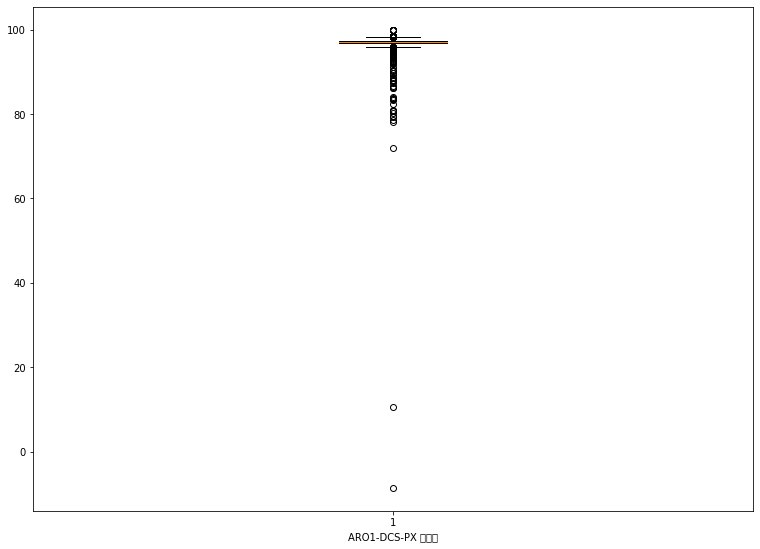

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel("ARO1-DCS-PX 回收率")
bp = ax.boxplot(df_2["ARO1-DCS-PX 回收率"].dropna().values)
# bp = ax.boxplot([df_2["ARO1-DCS-AC_L2_A"].dropna().values, df_2["ARO1-DCS-AC_L3_A"].dropna().values, df_2["ARO1-DCS-AC_L4_A"].dropna().values,
#           df_2["ARO1-DCS-AC_A_FA"].dropna().values, df_2["ARO1-DCS-AC_HF"].dropna().values, df_2["ARO1-LIMS-s704-744-p-Xylene"].dropna().values,
#           df_2["ARO1-LIMS-s912-744-p-Xylene"].dropna().values, df_2["ARO1-LIMS-s912-744-m-Xylene"].dropna().values, df_2["ARO1-LIMS-s917-744-p-Xylene"].dropna().values,
#           df_2["ARO1-LIMS-s916-744-p-Xylene"].dropna().values, df_2["ARO1-DCS-PX 回收率"].dropna().values])
plt.show()

# plt.show()

In [ ]:
# remove outliner
import numpy as np
for j in col:
  mean = df_2[j].mean()
  std = df_2[j].std()
  outliner = []
  for i in range(len(df_2[j])):
    if (df_2.loc[i,j] > (mean - std*3) and df_2.loc[i,j] < (mean + std*3)):
      pass
    else:
      outliner = outliner + [i]
  print(j , mean, std, (mean - std*3), (mean + std*3))
  df_2.loc[outliner, j] = np.nan

ARO1-DCS-FIC_98302_1 229.0349034101062 52.81671960614921 70.58474459165856 387.48506222855383
ARO1-DCS-FIC_98401_1 238.33618985552488 54.51488128935302 74.79154598746581 401.8808337235839
ARO1-DCS-AC_CTIME 31.885838501395916 3.9201443744124567 20.125405378158547 43.646271624633286
ARO1-DCS-AC_STIME 79.56027222491427 9.75567006165204 50.29326203995815 108.82728240987039
ARO1-LIMS-S704-BR_INDEX 2.2205701473290724 1.421962008035729 -2.045315876778114 6.486456171436259
ARO1-LIMS-s704-744-C9 85.86486917478473 68.3618662675151 -119.22072962776056 290.95046797733005
ARO1-LIMS-s704-744-C10+ 0.9780539693203448 61.078336880797636 -182.25695667307258 184.21306461171326
ARO1-LIMS-S704-WATER 36.93001020914389 18.97606894127738 -19.998196614688254 93.85821703297603
ARO1-LIMS-S704-TS 0.024448549714264363 0.04874386182828152 -0.1217830357705802 0.1706801351991089
ARO1-DCS-PDI_91102 2.758738875436874 0.5761245350100801 1.0303652704066335 4.487112480467114
ARO1-DCS-PDI_91202 2.7070884360326652 0.5721172

In [32]:
df_3 = df_2[x_col].dropna(axis="index").join(df_2.loc[df_2[x_col].dropna(axis="index").index.tolist(), y_col])
df_3

,ARO1-DCS-FIC_98302_1,ARO1-DCS-FIC_98401_1,ARO1-LIMS-S704-BR_INDEX,ARO1-LIMS-s704-744-C9,ARO1-LIMS-s704-744-C10+,ARO1-LIMS-S704-WATER,ARO1-LIMS-S704-TS,ARO1-DCS-PDI_91102,ARO1-DCS-PDI_91202,ARO1-LIMS-s912-744-p-Xylene,ARO1-LIMS-s912-744-m-Xylene,ARO1-LIMS-s917-744-p-Xylene,ARO1-LIMS-s916-744-p-Xylene,ARO1-DCS-PX 回收率
7,1.065122e-20,1.103528e-20,0.077020,0.017049,0.0,0.056437,0.005376,2.528644,2.541595,99.795898,604.0,48.698700,0.0395,NaN
15,1.065122e-20,1.103528e-20,0.077020,0.018470,0.0,0.056437,0.005376,2.562995,2.535559,99.846497,584.0,NaN,NaN,NaN
23,1.065122e-20,1.103528e-20,0.090909,0.023206,0.0,0.066855,0.010753,2.490574,2.558351,99.843201,612.0,NaN,NaN,NaN
31,1.065122e-20,1.103528e-20,0.066288,0.022259,0.0,0.062384,0.010753,2.555208,2.509361,99.835800,622.0,48.840199,0.1322,NaN
39,1.065122e-20,1.103528e-20,0.066288,0.013024,0.0,0.062384,0.010753,2.559671,2.519720,99.822998,669.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71415,1.207116e-20,1.283055e-20,0.046717,0.020838,0.0,0.063270,0.010753,3.070490,3.069563,99.722000,1586.0,NaN,NaN,96.334282
71423,1.207116e-20,1.283055e-20,0.046086,0.021075,0.0,0.046777,0.005376,3.091588,3.089269,99.722504,1564.0,NaN,NaN,96.361374
71431,1.207116e-20,1.283055e-20,0.037247,0.015865,0.0,0.085414,0.005376,3.070895,3.085334,99.724098,1570.0,36.984600,0.1525,96.388466
71439,1.207116e-20,1.283055e-20,0.037247,0.021312,0.0,0.085414,0.005376,3.089878,3.090815,99.724197,1580.0,NaN,NaN,96.411087


In [33]:
df_3.describe()

,ARO1-DCS-FIC_98302_1,ARO1-DCS-FIC_98401_1,ARO1-LIMS-S704-BR_INDEX,ARO1-LIMS-s704-744-C9,ARO1-LIMS-s704-744-C10+,ARO1-LIMS-S704-WATER,ARO1-LIMS-S704-TS,ARO1-DCS-PDI_91102,ARO1-DCS-PDI_91202,ARO1-LIMS-s912-744-p-Xylene,ARO1-LIMS-s912-744-m-Xylene,ARO1-LIMS-s917-744-p-Xylene,ARO1-LIMS-s916-744-p-Xylene,ARO1-DCS-PX 回收率
count,8.920000e+03,8.920000e+03,8920.000000,8920.000000,8920.000000,8920.000000,8920.000000,8920.000000,8920.000000,8920.000000,8920.000000,2973.000000,2973.000000,2888.000000
mean,1.084117e-20,1.128205e-20,0.140242,0.020348,0.000179,0.077902,0.013147,2.758422,2.706569,122.056273,1192.269238,38.261836,0.474576,96.850040
std,2.503217e-21,2.582056e-21,0.089812,0.016192,0.011189,0.040042,0.026222,0.576358,0.573461,1485.620166,1742.255848,7.286335,2.095144,2.964948
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063800,0.139300,0.189600,0.022000,-8.583796
25%,1.065122e-20,1.075803e-20,0.082071,0.011603,0.000000,0.058630,0.005376,2.554583,2.519485,99.716499,829.000000,36.397400,0.189200,96.738644
50%,1.192974e-20,1.238363e-20,0.121843,0.017523,0.000000,0.070187,0.005376,3.011139,2.976304,99.732300,1217.000000,39.210800,0.343800,97.069172
75%,1.197026e-20,1.257906e-20,0.174874,0.025337,0.000000,0.087692,0.010753,3.114043,3.044404,99.773804,1433.000000,42.819099,0.455500,97.322660
max,1.207150e-20,1.283055e-20,1.000000,1.000000,1.000000,1.000000,1.000000,4.992262,4.945866,99329.703125,89671.000000,50.292000,44.683201,100.000000


In [36]:
df_3_describe = df_3[col].describe()
df_3_describe.iloc[:,7:11]

,ARO1-DCS-PDI_91102,ARO1-DCS-PDI_91202,ARO1-LIMS-s912-744-p-Xylene,ARO1-LIMS-s912-744-m-Xylene
count,8920.000000,8920.000000,8920.000000,8920.000000
mean,2.758422,2.706569,122.056273,1192.269238
std,0.576358,0.573461,1485.620166,1742.255848
min,0.000000,0.000000,0.063800,0.139300
25%,2.554583,2.519485,99.716499,829.000000
50%,3.011139,2.976304,99.732300,1217.000000
75%,3.114043,3.044404,99.773804,1433.000000
max,4.992262,4.945866,99329.703125,89671.000000


<font size = 5>Analysis</font>
*   ARO2-LIMS-S708@PX
*   ARO2-LIMS-s922@PX
*   ARO2-LIMS-s922@MX


corr

In [37]:
df_3_corr = df_3[col].corr()[y_col]
df_3_corr.iloc[:,:4]

,ARO1-DCS-PDI_91102,ARO1-DCS-PDI_91202,ARO1-LIMS-s912-744-p-Xylene,ARO1-LIMS-s912-744-m-Xylene
ARO1-DCS-FIC_98302_1,0.886990,0.920121,0.006527,0.013512
ARO1-DCS-FIC_98401_1,0.880294,0.915450,0.006401,0.025300
ARO1-LIMS-S704-BR_INDEX,-0.221537,-0.205816,-0.013359,-0.015120
ARO1-LIMS-s704-744-C9,-0.000532,0.026605,-0.002434,0.324707
ARO1-LIMS-s704-744-C10+,-0.022552,-0.022255,-0.000359,0.527046
ARO1-LIMS-S704-WATER,-0.016751,-0.019908,-0.001006,0.009006
ARO1-LIMS-S704-TS,-0.053556,-0.046292,0.000148,0.021386
ARO1-DCS-PDI_91102,1.000000,0.950493,0.006521,0.035183
ARO1-DCS-PDI_91202,0.950493,1.000000,0.008596,0.037045
ARO1-LIMS-s912-744-p-Xylene,0.006521,0.008596,1.000000,-0.000783


xgboost

['ARO1-DCS-FIC_98302_1', 'ARO1-DCS-FIC_98401_1', 'ARO1-LIMS-S704-BR_INDEX', 'ARO1-LIMS-S704-TS', 'ARO1-LIMS-s704-744-C10+', 'ARO1-LIMS-S704-WATER', 'ARO1-LIMS-s704-744-C9'] : ARO1-DCS-PDI_91102
[05:37:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-DCS-PDI_91102 驗證分數:'

0.8930184382548494

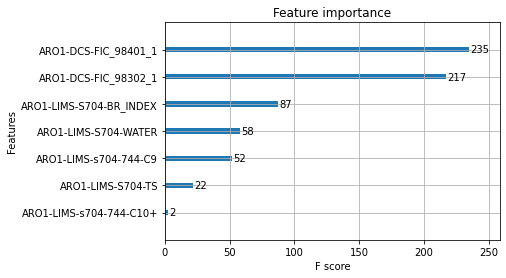

['ARO1-DCS-FIC_98302_1', 'ARO1-DCS-FIC_98401_1', 'ARO1-LIMS-S704-BR_INDEX', 'ARO1-LIMS-S704-TS', 'ARO1-LIMS-s704-744-C9', 'ARO1-LIMS-s704-744-C10+', 'ARO1-LIMS-S704-WATER'] : ARO1-DCS-PDI_91202
[05:37:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-DCS-PDI_91202 驗證分數:'

0.9328346419126208

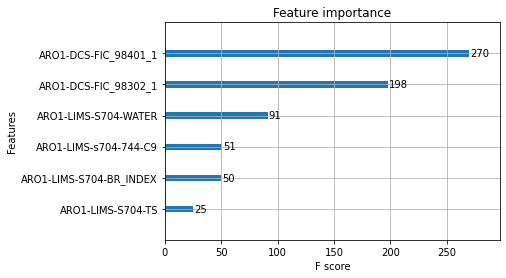

['ARO1-LIMS-S704-BR_INDEX', 'ARO1-DCS-FIC_98302_1', 'ARO1-DCS-FIC_98401_1', 'ARO1-LIMS-s704-744-C9', 'ARO1-LIMS-S704-WATER', 'ARO1-LIMS-s704-744-C10+', 'ARO1-LIMS-S704-TS'] : ARO1-LIMS-s912-744-p-Xylene
[05:37:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-LIMS-s912-744-p-Xylene 驗證分數:'

-0.38302138242608885

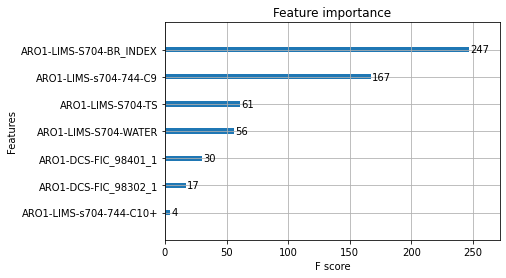

['ARO1-LIMS-s704-744-C10+', 'ARO1-LIMS-s704-744-C9', 'ARO1-DCS-FIC_98401_1', 'ARO1-LIMS-S704-TS', 'ARO1-LIMS-S704-BR_INDEX', 'ARO1-DCS-FIC_98302_1', 'ARO1-LIMS-S704-WATER'] : ARO1-LIMS-s912-744-m-Xylene
[05:37:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-LIMS-s912-744-m-Xylene 驗證分數:'

-0.7464888562831884

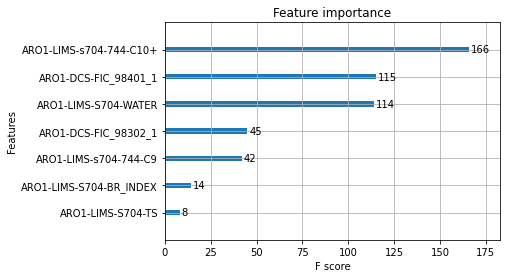

In [39]:
from sklearn.linear_model import LinearRegression
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
import matplotlib.pyplot as plt
import seaborn as sb

for i in y_col[:4]:
  y_label = i
  features = df_3_corr.abs().loc[x_col, y_label].sort_values(ascending=False).index.tolist()
  print(features,':',y_label)
  # for i in df_mean[x_col].columns:
  #   df_mean[i] = pd.to_numeric(df_mean[i],errors='coerce') 
  df_3_xgbr = df_3[features+[y_label]].dropna(axis=0)


  X = df_3_xgbr[features]
  y = df_3_xgbr[y_label]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = XGBRegressor()
  model.fit(X_train,y_train)
  display(f'{y_label} 驗證分數:',model.score(X_test,y_test))
  plot_importance(model)
  plt.show()

<font size = 5>Analysis</font>
*   ARO2-LIMS-S907@PX
*   ARO2-LIMS-S905@PX
*   ARO2-DCS-PX@Recovery

corr

In [43]:
df_3_1_24_corr = df_3[col].corr()[y_col]
df_3_1_24_corr.iloc[:,4:]

,ARO1-LIMS-s917-744-p-Xylene,ARO1-LIMS-s916-744-p-Xylene,ARO1-DCS-PX 回收率
ARO1-DCS-FIC_98302_1,-0.003757,-0.007066,-0.099450
ARO1-DCS-FIC_98401_1,-0.017950,-0.008766,-0.094883
ARO1-LIMS-S704-BR_INDEX,0.023064,-0.025615,0.102852
ARO1-LIMS-s704-744-C9,-0.083205,-0.021233,0.122476
ARO1-LIMS-s704-744-C10+,-0.004389,-0.004074,-0.208307
ARO1-LIMS-S704-WATER,-0.015900,0.004324,-0.139119
ARO1-LIMS-S704-TS,0.033714,0.005349,-0.090230
ARO1-DCS-PDI_91102,-0.015203,-0.014049,-0.047941
ARO1-DCS-PDI_91202,-0.027990,-0.012961,-0.058197
ARO1-LIMS-s912-744-p-Xylene,0.012762,0.002340,0.663591


In [44]:
df_3_1_24_describe = df_3[col].describe()
df_3_1_24_describe.iloc[:,11:]

,ARO1-LIMS-s917-744-p-Xylene,ARO1-LIMS-s916-744-p-Xylene,ARO1-DCS-PX 回收率
count,2973.000000,2973.000000,2888.000000
mean,38.261836,0.474576,96.850040
std,7.286335,2.095144,2.964948
min,0.189600,0.022000,-8.583796
25%,36.397400,0.189200,96.738644
50%,39.210800,0.343800,97.069172
75%,42.819099,0.455500,97.322660
max,50.292000,44.683201,100.000000


xgboost

['ARO1-LIMS-s704-744-C9', 'ARO1-LIMS-S704-TS', 'ARO1-LIMS-S704-BR_INDEX', 'ARO1-DCS-FIC_98401_1', 'ARO1-LIMS-S704-WATER', 'ARO1-LIMS-s704-744-C10+', 'ARO1-DCS-FIC_98302_1'] : ARO1-LIMS-s917-744-p-Xylene
[05:40:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-LIMS-s917-744-p-Xylene 驗證分數:'

0.09489693101938335

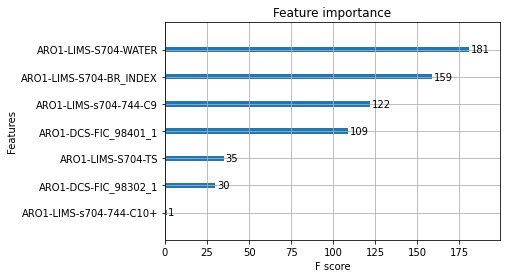

['ARO1-LIMS-S704-BR_INDEX', 'ARO1-LIMS-s704-744-C9', 'ARO1-DCS-FIC_98401_1', 'ARO1-DCS-FIC_98302_1', 'ARO1-LIMS-S704-TS', 'ARO1-LIMS-S704-WATER', 'ARO1-LIMS-s704-744-C10+'] : ARO1-LIMS-s916-744-p-Xylene
[05:40:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-LIMS-s916-744-p-Xylene 驗證分數:'

0.07715412526667964

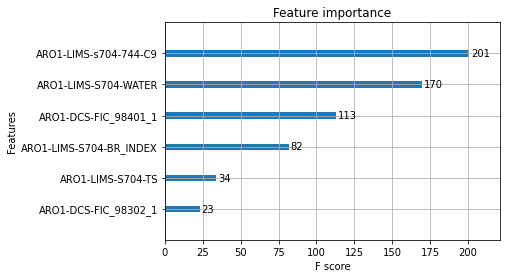

['ARO1-LIMS-s704-744-C10+', 'ARO1-LIMS-S704-WATER', 'ARO1-LIMS-s704-744-C9', 'ARO1-LIMS-S704-BR_INDEX', 'ARO1-DCS-FIC_98302_1', 'ARO1-DCS-FIC_98401_1', 'ARO1-LIMS-S704-TS'] : ARO1-DCS-PX 回收率
[05:40:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO1-DCS-PX 回收率 驗證分數:'

-1.0210445766704255

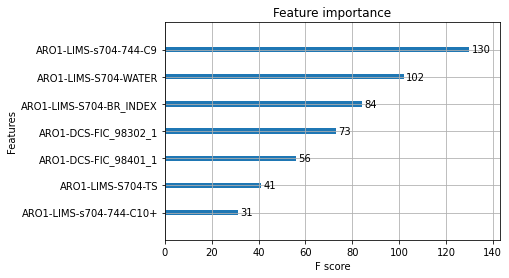

In [42]:
for i in y_col[4:]:
  y_label = i
  features = df_3_1_24_corr.abs().loc[x_col, y_label].sort_values(ascending=False).index.tolist()
  print(features,':',y_label)
  # for i in df_mean[x_col].columns:
  #   df_mean[i] = pd.to_numeric(df_mean[i],errors='coerce') 
  df_3_1_24_xgbr = df_3[features+[y_label]].dropna(axis=0)


  X = df_3_1_24_xgbr[features]
  y = df_3_1_24_xgbr[y_label]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = XGBRegressor()
  model.fit(X_train,y_train)
  display(f'{y_label} 驗證分數:',model.score(X_test,y_test))
  plot_importance(model)
  plt.show()